# Tópico 1 – Séries temporais e gráficos de linha

Em muitos conjuntos de dados, o momento em que cada dado foi observado, seja o minuto, hora, dia, mês ou ano, é uma informação relevante. Quando isso ocorre, existe uma ordem inata nos dados, do mais antigo para o mais recente. Essa estrutura sequencial deve ser levada em conta durante a análise desses dados, pois muitos padrões surgem a partir dessa análise, como ciclos, tendências e exceções. Dados que são coletados sequencialmente ao longo do tempo são denominados séries temporais. Alguns exemplos de séries temporais são valores de ações de bolsas de valores, número de acessos diários em um site, nível da maré, vendas mensais de um dado produto, número de nascimentos diários, entre outros.

Neste tópico, você irá aprender a reconhecer e utilizar gráficos de linha, uma das técnicas mais conhecidas para analisar séries temporais utilizando visualização de dados.

Para entender os conceitos deste conteúdo, você irá explorar um conjunto de dados reais de medidas feitas ao longo do tempo por diferentes tipos de sensores instalados dentro de um quarto. Foram feitas medidas de temperatura, umidade, nível de iluminação e concentração de CO2 a cada minuto, durante 5 dias. Os dados originais são disponibilizados de forma aberta no repositório da Universidade da Califórnia, que você pode conferir neste link: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+.

Porém, você irá trabalhar com uma versão reduzida desse conjunto de dados que pode ser acessada em formato .TXT, neste link: Download dados.

Os exemplos serão executados no já conhecido ambiente Jupyter Notebooks e necessitam das bibliotecas pandas, matplotlib e seaborn devidamente instaladas. Se você utiliza a distribuição Anaconda, que é fortemente recomendado, elas já vêm instaladas por padrão. Primeiramente, você deve criar um notebook e importar e configurar as bibliotecas que serão utilizadas. Confira no código a seguir: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

Nas linhas 1, 2 e 3, são importadas as bibliotecas atribuindo a elas os respectivos pseudônimos que são utilizados por padrão. O comando na linha 4, chamado palavra mágica, é específico do Jupyter Notebook, e apenas diz que imagens geradas pelo matplotlib devem ser exibidas na página do Notebook. A linha 5 é opcional, e configura o estilo dos gráficos gerados com a biblioteca seaborn.

In [2]:
uri = 'https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/room_data.txt'
room = pd.read_csv(uri)
room.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 18:49:59,22.290,27.3900,0.0,621.00,0.004559
1,2015-02-04 19:50:00,21.890,27.1000,0.0,548.50,0.004401
2,2015-02-04 20:50:00,21.600,26.4725,0.0,509.75,0.004222
3,2015-02-04 21:49:59,21.445,25.7450,0.0,488.00,0.004067
4,2015-02-04 22:50:00,21.290,25.7000,0.0,467.00,0.004021


Na linha 1, o endereço dos dados é armazenado na variável uri, que é passada para a função read_csv() na linha 2, para criar um DataFrame que é passado para a variável room. As colunas da tabela representam, da esquerda para a direita, a data da coleta do dado, a temperatura do quarto em graus Celsius, a umidade relativa do ar, o nível de luminosidade, a concentração de CO2 e a proporção de umidade, que é calculada a partir da umidade relativa e da temperatura. Agora que você carregou os dados, podemos começar a explorá-los. Vamos lá!

Digamos que você deseje saber a variação da temperatura do quarto ao longo dos dias. Como representar esses valores? Uma primeira ideia poderia ser utilizar o já conhecido gráfico de dispersão, mapeando a temperatura no eixo vertical do gráfico. Vamos tentar essa abordagem utilizando a função scatterplot() do seaborn. Confira:

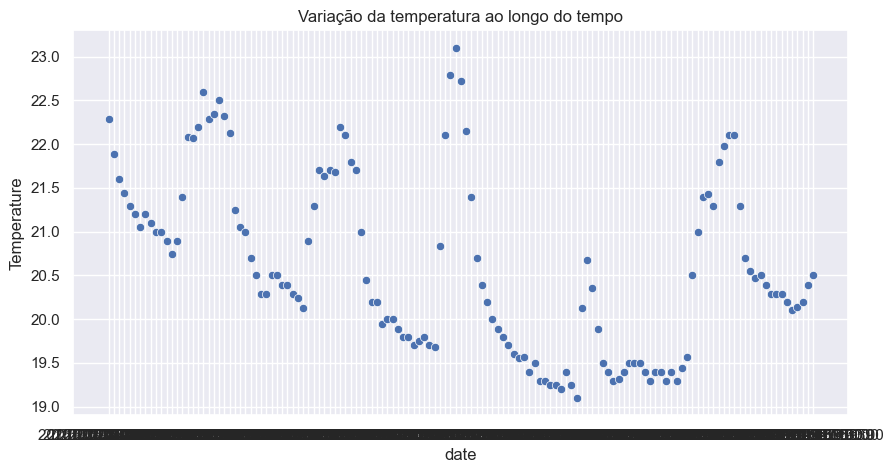

In [4]:
plt.figure(figsize=(10,5))
plt.title('Variação da temperatura ao longo do tempo')
sns.scatterplot(x='date', y='Temperature', data=room)
plt.show()

Note que esse gráfico de dispersão é diferente de outros que você já deve ter trabalhado, pois cada ponto está igualmente espaçado no eixo horizontal e eles possuem uma ordenação muito bem definida. O uso de pontos não enfatiza essa estrutura sequencial.

Perceba também que as informações do eixo horizontal ficarão tão cheias que não é possível ler nada. Isso ocorre porque, ao ler os dados do arquivo, o pandas interpreta a data como um texto, uma variável categórica. Como, nesse caso, o tempo é contínuo, é necessário converter o valor para um tipo que o pandas reconheça como tempo, chamado datetime. Isso pode ser feito com a função do pandas to_datetime(). Iremos melhorar essa visualização a seguir! 

Uma melhor abordagem para visualizar sequências é conectar cada ponto com uma linha, criando a percepção de continuidade. Esse gráfico é chamado de gráfico de linha, e pode ser criado com o seaborn através da função lineplot(). Confira no exemplo a seguir como converter a coluna ‘date’ para um valor datetime e representar a temperatura do quarto ao longo do tempo com gráfico de linha: 

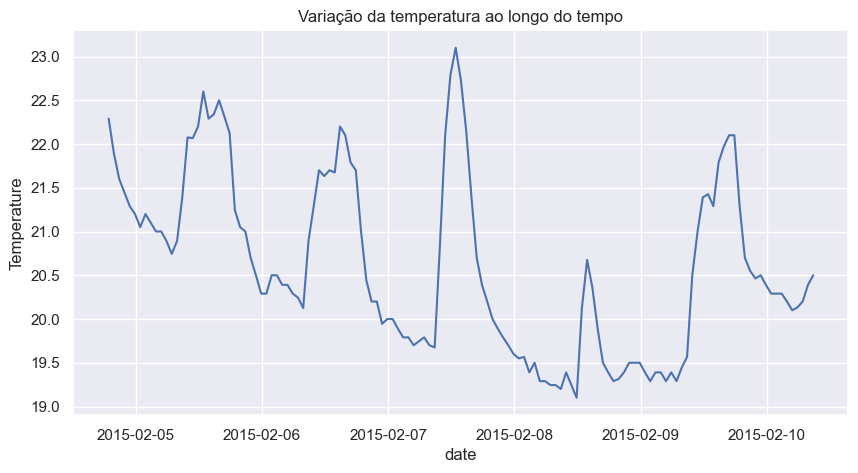

In [6]:
room['date'] = pd.to_datetime(room['date'])
plt.figure(figsize=(10,5))
plt.title('Variação da temperatura ao longo do tempo')
sns.lineplot(x='date', y='Temperature', data=room)
plt.show()

Na linha 1 do código, a coluna ‘date’ é convertida ao tipo datetime, utilizado em Python para representar datas e horários. As linhas 2 e 3 configuram o tamanho e o título do gráfico, conforme feito anteriormente. Na linha 4 é chamada a função lineplot(), passando como parâmetros para o eixo x a coluna ‘date’, para o eixo y a coluna ‘Temperatura’, e indicando que os dados estão na variável room. Note como a estrutura sequencial é percebida mais nitidamente no gráfico de linha! A partir dele, alguns padrões podem ser observados. Por exemplo, parece haver um ciclo diário na variação da temperatura, que diminui durante a madrugada, cresce durante o dia, atinge o pico pela tarde e passa a diminuir até o fim do dia (o início de cada dia, ou seja, as 00:00, é marcado no eixo x). Observe que houve uma mudança de comportamento no dia 07, com um pico incomum, que pode ter sido causado pela presença de pessoas no quarto.

Um detalhe importante sobre essa série temporal: é que foi feita exatamente uma medição em cada momento. Isso nem sempre é o caso. Por exemplo, como as medidas de sensores variam conforme a calibração, poderia se ter utilizado mais de um sensor de temperatura, tirando mais de uma medição por momento, para se obter um resultado mais preciso. Vamos discutir esse tipo de caso a seguir.

Em muitos conjuntos de dados, podem existir múltiplas observações feitas durante o mesmo momento. Nesses casos, o comportamento padrão do seaborn é agregar os múltiplos valores em uma única linha que representa a média e exibir uma área sombreada que representa o intervalo de confiança para aquele valor. Vamos verificar como isso ocorre utilizando um outro conjunto de dados como exemplo. Para acessar os dados, confira este link: https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/hiv_data.txt. Esses dados foram coletados pelo Banco Mundial e contém informações sobre a incidência do vírus HIV ao longo de mais de 20 anos para diversos países. Vamos carregar e exibir as primeiras linhas desses dados. Confira: 

In [8]:
hiv_uri = 'https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/hiv_data.txt'
hiv = pd.read_csv(hiv_uri)
hiv.head()

,country,date,HIV Rate,Income Level
0,Australia,2017,0.1,HIC
1,Australia,2016,0.1,HIC
2,Australia,2015,0.1,HIC
3,Australia,2014,0.1,HIC
4,Australia,2013,0.1,HIC


Note que os dados foram carregados de forma idêntica ao já feito anteriormente. As colunas do DataFrame correspondem ao país, a data, a taxa de HIV e a uma classificação socioeconômica de nível de renda médio da população, que pode ser HIC (alto nível de renda), MIC (médio nível de renda) e LIC (baixo nível de renda). Com esses dados, pode-se explorar a tendência da taxa de HIV ao longo dos anos no mundo, por nível de renda ou por países individualmente. Perceba que, ao criar um gráfico com a taxa de HIV global, são consideradas, para cada ano, as medições em vários países. Como representar essas várias medições em uma mesma linha? Confira a seguir. 

Digamos que queremos visualizar como a taxa de HIV variou no mundo todo ao redor dos anos. Basta utilizar a função lineplot() igual como já feito anteriormente, passando a coluna ‘date’ para o eixo x e a coluna ‘HIV Rate’ para o eixo y. Confira a seguir: 

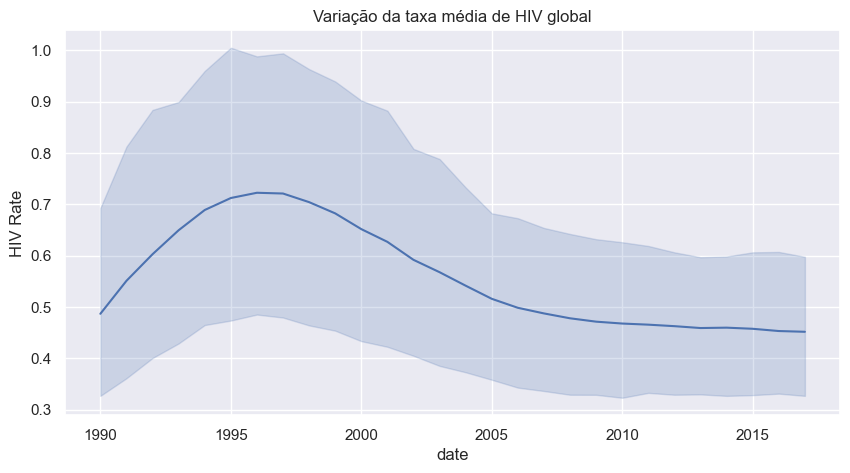

In [9]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV global')
sns.lineplot(x='date', y='HIV Rate', data=hiv)
plt.show()

Como já foi comentado, existem diversas taxas de HIV em cada ano, correspondente à taxa de cada país. Quando há múltiplas medições em um mesmo tempo, a função lineplot() exibe por padrão uma linha formada pela média de todos os valores em cada tempo. Como os dados podem variar em torno da média, é exibido também um intervalo de confiança na forma de uma área sombreada, indicando a região provável em que se encontram os dados. Grandes áreas sombreadas indicam que os dados variam muito. Se desejar mostrar apenas a linha da média sem o intervalo de confiança, pode-se alterar o parâmetro ci (confidence interval), passando o valor None. Isso será mostrado nos próximos exemplos. Considere agora o gráfico resultante. O intervalo de confiança grande indica que as taxas variam bastante entre os países. Apesar disso, notamos que houve uma tendência global, onde a taxa média de HIV estava em crescimento na primeira metade dos anos 90, atingindo o pico na segunda metade e passando a decrescer. Por volta da segunda metade dos anos 2000, a taxa passou a decair bem mais lentamente. Esse gráfico mostra uma tendência mundial. Mas, e se desejarmos especificar e observar as tendências por nível de renda? Faremos isso a seguir. 

Digamos que além da taxa média global, estamos interessados nas taxas médias por nível de renda dos países, como podemos fazer? A função lineplot() possui a mesma flexibilidade da função scatterplot(), podendo representar variáveis categóricas pela cor, tamanho ou forma, através dos parâmetros hue, size e style, respectivamente. Por exemplo, para visualizar as taxas por níveis de renda, basta passar a coluna ‘Income Level’ para o parâmetro hue, para que a função desenhe uma curva de cor diferente referente a cada nível. Confira a seguir: 

C:\Users\Fabiano\AppData\Local\Temp\ipykernel_22232\4007443217.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='HIV Rate', hue='Income Level', ci=None, data=hiv)


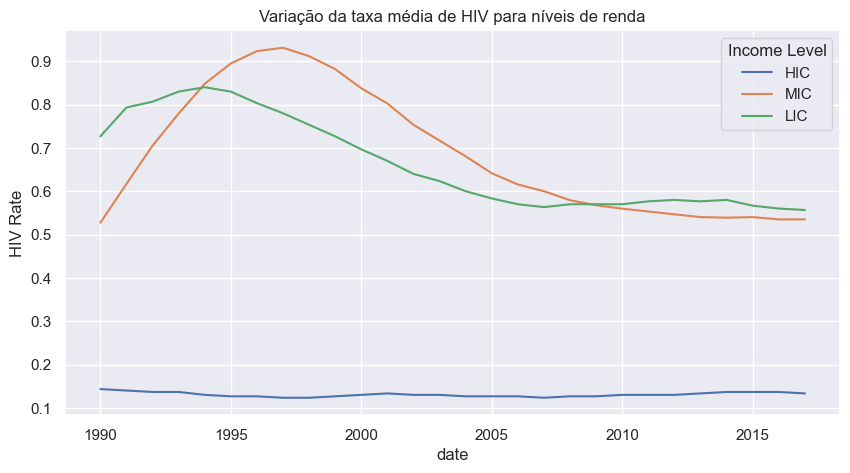

In [12]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x='date', y='HIV Rate', hue='Income Level', ci=None, data=hiv)
plt.show()

No código, as linhas 1 e 2 configuram o tamanho e o título da imagem, conforme feito anteriormente. Note que na linha 3, foi passado o valor None para o parâmetro ci, indicando que nenhum intervalo de confiança será desenhado, para que o gráfico resultante fique mais limpo. A cor foi usada por gerar um resultado mais nítido, mas a coluna ‘Income Level’ poderia ter sido passada para o parâmetro style, o que geraria diferentes tipos de linhas pontilhadas. Experimente usar esse parâmetro. Que padrões você consegue observar nos resultados? Como imaginado, os países com baixa renda tiveram um pico maior. Os países de alta renda, se mantiveram estáveis, com uma baixa taxa média. Já os países com renda média atingiram o pico mais cedo que os países de baixa renda e logo passaram a decrescer sua taxa. Porém, em um momento a partir do final dos anos 2000, a taxa dos países de baixa renda fica abaixo dos de média e se mantém assim até o final dos dados disponíveis. Talvez essa queda na taxa dos países de baixa renda tenha se devido a eficientes políticas de saúde pública. É preciso investigar se ocorreu somente em alguns países ou foi uma tendência geral. 

Assim como no caso dos gráficos de dispersão, é prudente evitar representar muitas variáveis simultaneamente no mesmo gráfico de linha, pois a visualização corre o risco de ficar poluída e confusa com o excesso de informação. Esse cuidado deve ser maior ainda quando existem muitas categorias possíveis para uma dada variável. Por exemplo, digamos que você queira visualizar uma série temporal distinta para a taxa de HIV de cada país. Pode-se passar a coluna ‘country’ para o parâmetro hue. Confira: 

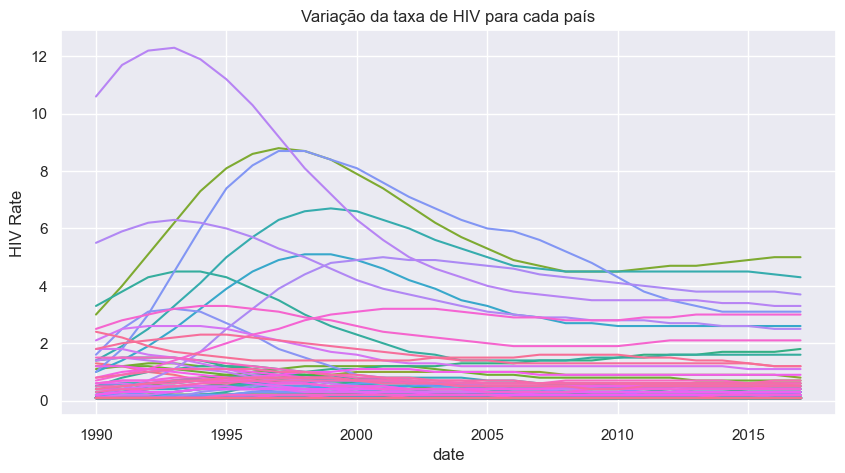

In [13]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa de HIV para cada país')
sns.lineplot(x='date', y='HIV Rate', hue='country', legend = False, data=hiv)
plt.show()

No código, as linhas 1 e 2 configuram o tamanho e o título da imagem, conforme feito anteriormente. Na linha 3 foi passado o valor False para o parâmetro legend, indicando que a legenda não deve ser exibida. Isso foi feito devido à grande quantidade de países que geraria uma legenda muito grande. O que você achou da imagem? Visualizar muitas categorias em gráficos de linha pode ser útil para perceber padrões que se destacam. Porém, note que nos países que tiveram comportamento similar é difícil perceber padrões em meio ao emaranhado de linhas sobrepostas. Nessas situações, pode ser útil trabalhar com subgrupos menores. Como sempre, a melhor escolha irá depender do objetivo da sua visualização. Séries temporais são tipos de dados muito importantes e existem várias formas de analisá-las. Você agora tem ótimas ferramentas para começar a explorar séries temporais. 



Caro estudante, você chegou ao final deste conteúdo sobre séries temporais.

Aqui, você conheceu o conceito de série temporal e aprendeu como criar gráficos de linha de diferentes tipos para representar e interpretar padrões em séries temporais. Analisar séries temporais pode ser difícil, mas você já possui ferramentas poderosas para essa tarefa. Lembre-se sempre de exercitar o que aprendeu em diferentes conjuntos de dados. Procure também experimentar diferentes estilos para seus gráficos de linha, consultando a documentação oficial do seaborn.

Espero que você tenha aprendido bastante! Até mais!


Referências

    WILKE, Claus O. Fundamentals of Data Visualization. O’Reilly, 2019.
    Matplotlib. https://matplotlib.org/index.html. Acessado pela última vez em Maio de 2020.
    Seaborn. https://seaborn.pydata.org/tutorial.html. Acessado pela última vez em Maio de 2020.
    Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, Véronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.
